# Training the Model

## 1. Creating Datasets

In [1]:
from model.dataset import FreiHANDDataset, FreiHANDDataLoader
from settings import MODEL_CONFIG

Loading Training set.

In [2]:
train_dataset = FreiHANDDataset(set_type="train")
train_dataset

FreiHAND [Train - 26000 items]

In [3]:
train_dataloader = FreiHANDDataLoader(
    dataset=train_dataset,
    batch_size=MODEL_CONFIG["batch_size"],
    shuffle=True,
    drop_last=True,
    num_workers=2
)
train_dataloader

FreiHANDDataLoader [Train - Batch size: 48 - Length: 541]

Loading Validation set.

In [4]:
val_dataset = FreiHANDDataset(set_type="val")
val_dataset

FreiHAND [Val - 5000 items]

In [5]:
val_dataloader = FreiHANDDataLoader(
    dataset=val_dataset,
    batch_size=MODEL_CONFIG["batch_size"],
    shuffle=True,
    drop_last=True,
    num_workers=2
)
val_dataloader

FreiHANDDataLoader [Val - Batch size: 48 - Length: 104]

## 2. Model and Loss

Generating the NeuralNetwork.

In [6]:
from model.network import HandPoseEstimationUNet, IoULoss

In [7]:
model = HandPoseEstimationUNet(
    in_channel=MODEL_CONFIG["in_channels"],
    out_channel=MODEL_CONFIG["out_channels"]
)
model = model.to(MODEL_CONFIG["device"])
model

U-Net[In-channels: 3; Out-channels: 21]

Generating the Loss

In [8]:
loss = IoULoss()
loss

IoULoss

## 3. Training

Generating the trainer.

In [9]:
from model.trainer import Trainer

trainer = Trainer(
    model=model,
    criterion=loss,
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    epochs=MODEL_CONFIG["epochs"],
    batches_per_epoch=MODEL_CONFIG["batches_per_epoch"],
    batches_per_epoch_val=MODEL_CONFIG["batches_per_epoch_val"]
)
trainer

Trainer [Epochs: 1000; Batches per Epoch: 50; Batches per Epoch Validation: 20]

Evaluating the model.

In [10]:
%%time
model = trainer.train()

INFO: Epoch: 1/1000, Train Loss=0.9929181606, Val Loss=0.9928370061
INFO: Epoch: 2/1000, Train Loss=0.9927490564, Val Loss=0.9926514796
INFO: Epoch: 3/1000, Train Loss=0.9925731245, Val Loss=0.9924645197
INFO: Epoch: 4/1000, Train Loss=0.9923763076, Val Loss=0.9922494519
INFO: Epoch: 5/1000, Train Loss=0.992127505, Val Loss=0.9918954174
INFO: Epoch: 6/1000, Train Loss=0.9917877889, Val Loss=0.9914683104
INFO: Epoch: 7/1000, Train Loss=0.9913033761, Val Loss=0.9909568202
INFO: Epoch: 8/1000, Train Loss=0.9905855212, Val Loss=0.9902522365
INFO: Epoch: 9/1000, Train Loss=0.9895273295, Val Loss=0.9887352047
INFO: Epoch: 10/1000, Train Loss=0.9879703136, Val Loss=0.9866542703
INFO: Epoch: 11/1000, Train Loss=0.9857794526, Val Loss=0.9841956184
INFO: Epoch: 12/1000, Train Loss=0.9825307376, Val Loss=0.9804158778
INFO: Epoch: 13/1000, Train Loss=0.9723703148, Val Loss=0.9605496072
INFO: Epoch: 14/1000, Train Loss=0.9485740311, Val Loss=0.9407394699
INFO: Epoch: 15/1000, Train Loss=0.930878290

Plot Training and Validation loss among epochs.Model

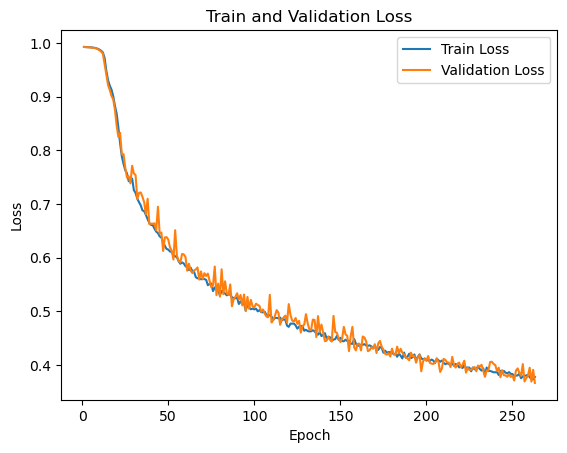

In [11]:
trainer.plot_loss()